Computing for size 3×3...


Size 3: 100%|███████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:01<00:00, 35.08it/s]


Computing for size 9×9...


Size 9: 100%|███████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:21<00:00,  2.40it/s]


Computing for size 27×27...


Size 27: 100%|██████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:26<00:00,  1.92it/s]


Computing for size 81×81...


Size 81: 100%|██████████████████████████████████████████████████████████████████████████████████████| 51/51 [01:10<00:00,  1.39s/it]


Computing for size 243×243...


Size 243: 100%|█████████████████████████████████████████████████████████████████████████████████████| 51/51 [08:02<00:00,  9.46s/it]


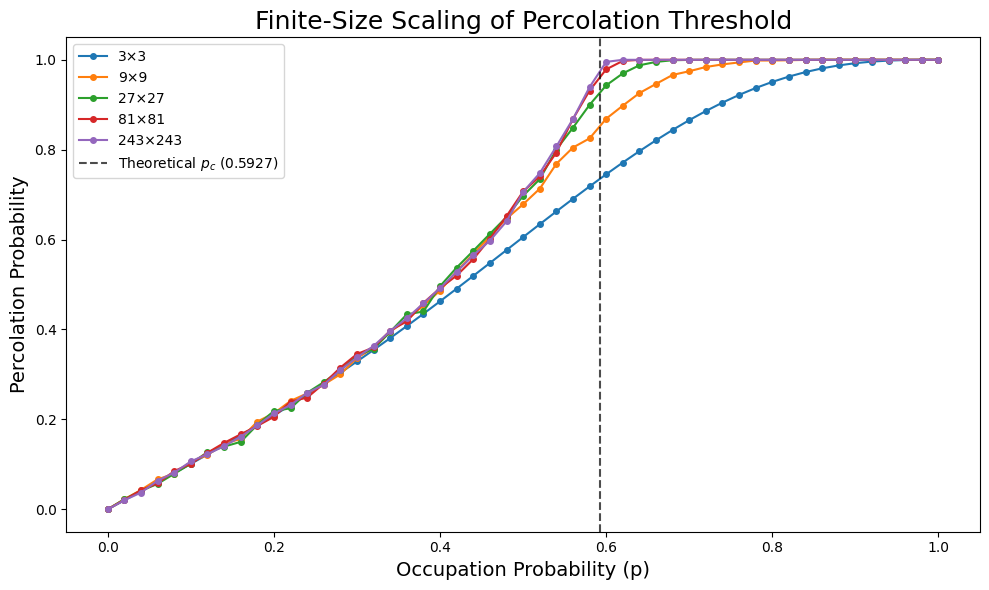

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from tqdm import tqdm
import itertools

def generate_percolation_lattice(size, p):
    """Generate a percolation lattice with given size and occupation probability"""
    return np.random.choice([0, 1], (size, size), p=[1-p, p])

def check_percolation(lattice):
    """Check if lattice percolates from top to right side"""
    labeled, _ = label(lattice)
    
    # Get labels on top side (first row)
    top_labels = set(labeled[0, :]) - {0}
    
    # Get labels on right side (last column)
    right_labels = set(labeled[:, -1]) - {0}
    
    # Check if any cluster connects top and right sides
    return float(bool(top_labels & right_labels))

def exact_percolation_probability(size, p):
    """Compute exact percolation probability for small lattices (size <= 5)"""
    prob_tot = 0
    # Generate all possible configurations
    for config in itertools.product([0, 1], repeat=size*size):
        lattice = np.array(config).reshape(size, size)
        lattice_prob = 1
        if check_percolation(lattice):
            for num in lattice.flatten():
                if num == 0:
                    lattice_prob *= (1 - p)
                else:
                    lattice_prob *= p
            prob_tot += lattice_prob
    return prob_tot

                    
            
            
    return percolating_configs / total_configs

def monte_carlo_percolation_probability(size, p, num_samples=5000):
    """Compute percolation probability using Monte Carlo for larger lattices"""
    percolating_count = 0
    for _ in range(num_samples):
        lattice = generate_percolation_lattice(size, p)
        if check_percolation(lattice):
            percolating_count += 1
    return percolating_count / num_samples

# Configuration
sizes = [3, 9, 27, 81, 243]  # Sizes to compute (6 is the practical limit)
p_values = np.linspace(0, 1, 51)  # Probability values to evaluate
num_samples = 5000  # Monte Carlo samples for larger sizes

# Compute percolation probabilities
results = {}
for size in sizes:
    print(f"Computing for size {size}×{size}...")
    probs = []
    
    # Use exact method for small sizes, Monte Carlo for larger
    method = exact_percolation_probability if size <= 3 else monte_carlo_percolation_probability
    
    for p in tqdm(p_values, desc=f"Size {size}"):
        if size <= 5:
            prob = method(size, p)
        else:
            prob = method(size, p, num_samples)
        probs.append(prob)
    
    results[size] = probs

# Plot results
plt.figure(figsize=(10, 6))
for size, probs in results.items():
    plt.plot(p_values, probs, 'o-', label=f'{size}×{size}', markersize=4)

# Theoretical critical point
plt.axvline(0.5927, color='black', linestyle='--', alpha=0.7, label='Theoretical $p_c$ (0.5927)')
plt.xlabel('Occupation Probability (p)', fontsize=14)
plt.ylabel('Percolation Probability', fontsize=14)
plt.title('Finite-Size Scaling of Percolation Threshold', fontsize=18)
plt.legend()
plt.tight_layout()
plt.savefig('percolation_finite_size_scaling.pdf', bbox_inches='tight')
plt.show()